# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
!pip install citipy

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [11]:
cities

['port-aux-francais',
 'hermanus',
 'haiku-pauwela',
 'kenora',
 'nyala',
 'olonkinbyen',
 'zakynthos',
 'port mathurin',
 'vadso',
 'tudor vladimirescu',
 'adrar',
 'yellowknife',
 'dudinka',
 'beloyarskiy',
 'edinburgh of the seven seas',
 'kingscliff',
 'tazovsky',
 'buka',
 'paidha',
 'kapuskasing',
 "port saint john's",
 'balurghat',
 'vilyuchinsk',
 'al kut',
 'saint-philippe',
 'san patricio',
 'gombi',
 "nar'yan-mar",
 'dadhar',
 'adamstown',
 'nuuk',
 'papatowai',
 'larose',
 'waitangi',
 'port shepstone',
 'kalmunai',
 'grytviken',
 'yasuj',
 'constantia',
 'nagqu',
 'saudarkrokur',
 'anadyr',
 'port lincoln',
 'shitanjing',
 'puerto san carlos',
 'puerto natales',
 'saldanha',
 "hats'avan",
 'fale old settlement',
 'tura',
 'ribeira grande',
 'al kharijah',
 'kadoma',
 'taiohae',
 'puerto ayora',
 'mahina',
 'winburg',
 'kantunilkin',
 'villa huidobro',
 'petropavlovsk-kamchatsky',
 'college',
 'margaret river',
 'albany',
 'kapit',
 'nova sintra',
 'minas de marcona',
 'tou

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    #city_url = f"{url}appid={weather_api_key}&units=metric&q=London"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url).json()
        #print(city_weather_response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response["coord"]["lat"]
        city_lng = city_weather_response["coord"]["lon"]
        city_max_temp = city_weather_response["main"]["temp_max"]
        city_humidity = city_weather_response["main"]["humidity"]
        city_clouds = city_weather_response["clouds"]["all"]
        city_wind = city_weather_response["wind"]["speed"]
        city_country = city_weather_response["sys"]["country"]
        city_date = city_weather_response["dt"]
        #print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        #pass
    #break          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | kenora
Processing Record 5 of Set 1 | nyala
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | zakynthos
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | tudor vladimirescu
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | beloyarskiy
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | kingscliff
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | buka
Processing Record 19 of Set 1 | paidha
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | port saint john's
Processing Record 22 of Set 1 | ba

In [13]:
city_data

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 5.18,
  'Humidity': 79,
  'Cloudiness': 90,
  'Wind Speed': 7.47,
  'Country': 'TF',
  'Date': 1714942162},
 {'City': 'hermanus',
  'Lat': -34.4187,
  'Lng': 19.2345,
  'Max Temp': 12.67,
  'Humidity': 67,
  'Cloudiness': 24,
  'Wind Speed': 4.79,
  'Country': 'ZA',
  'Date': 1714942175},
 {'City': 'haiku-pauwela',
  'Lat': 20.9219,
  'Lng': -156.3051,
  'Max Temp': 25.09,
  'Humidity': 74,
  'Cloudiness': 40,
  'Wind Speed': 10.29,
  'Country': 'US',
  'Date': 1714942165},
 {'City': 'kenora',
  'Lat': 49.8167,
  'Lng': -94.4337,
  'Max Temp': 14.54,
  'Humidity': 47,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'CA',
  'Date': 1714942318},
 {'City': 'nyala',
  'Lat': 12.05,
  'Lng': 24.8833,
  'Max Temp': 28.71,
  'Humidity': 11,
  'Cloudiness': 0,
  'Wind Speed': 3.6,
  'Country': 'SD',
  'Date': 1714942540},
 {'City': 'olonkinbyen',
  'Lat': 70.9221,
  'Lng': -8.7187,
  'Max Temp': 0.92,
  'Hum

In [14]:
# Convert the cities weather data into a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.18,79,90,7.47,TF,1714942162
1,hermanus,-34.4187,19.2345,12.67,67,24,4.79,ZA,1714942175
2,haiku-pauwela,20.9219,-156.3051,25.09,74,40,10.29,US,1714942165
3,kenora,49.8167,-94.4337,14.54,47,75,5.66,CA,1714942318
4,nyala,12.0500,24.8833,28.71,11,0,3.60,SD,1714942540


In [19]:
# Export the City_Data into a csv
# import os

# # Create the 'output_data' directory if it doesn't exist
# if not os.path.exists('output_data1'):
#     os.makedirs('output_data1')
    
city_data_df.to_csv("output_data1/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data1/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.18,79,90,7.47,TF,1714942162
1,hermanus,-34.4187,19.2345,12.67,67,24,4.79,ZA,1714942175
2,haiku-pauwela,20.9219,-156.3051,25.09,74,40,10.29,US,1714942165
3,kenora,49.8167,-94.4337,14.54,47,75,5.66,CA,1714942318
4,nyala,12.0500,24.8833,28.71,11,0,3.60,SD,1714942540


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

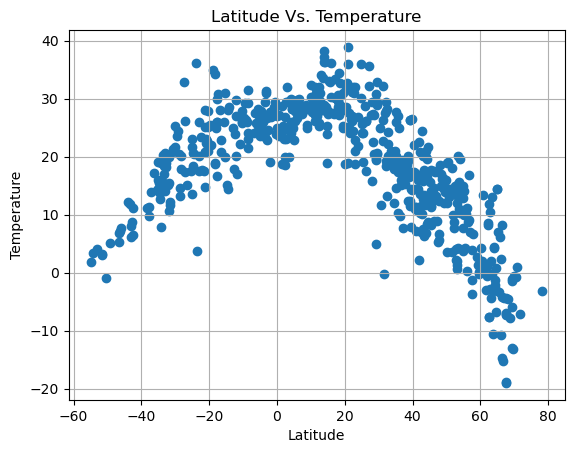

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data1/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

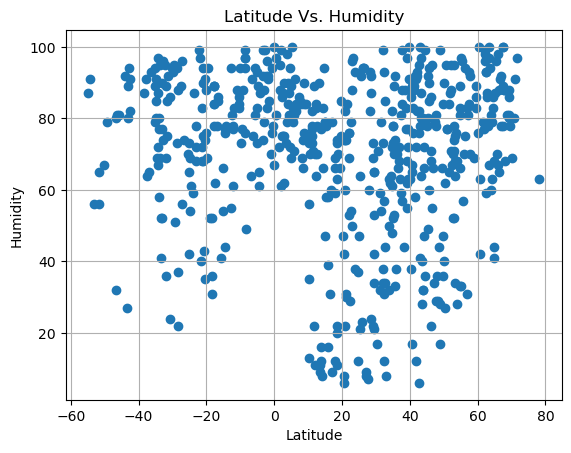

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data1/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

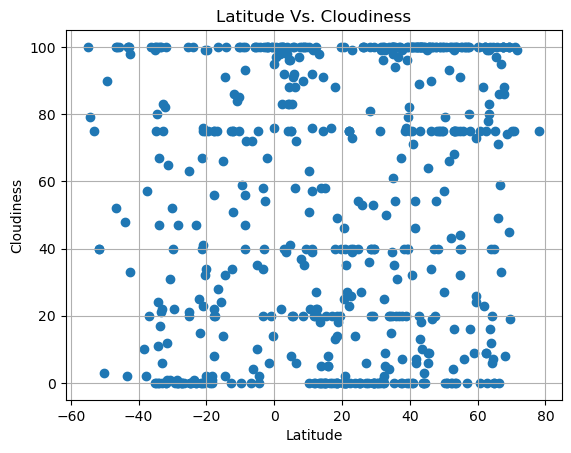

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data1/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

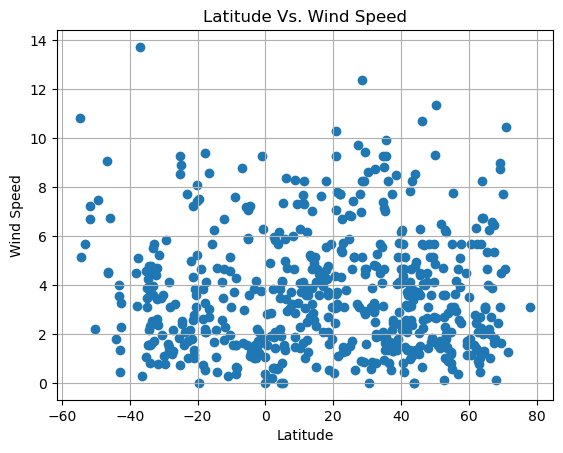

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data1/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


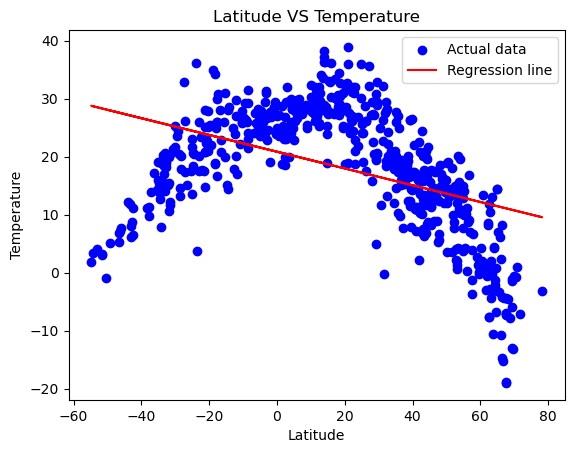

In [52]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress


slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
Linearreg = slope * city_data_df['Lat'] + intercept
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', label='Actual data')
plt.plot(city_data_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude VS Temperature')
plt.legend()
plt.show()

# print(f'Correlation Coefficient: {correlation}')
# print(f'Regression Line: Tumor Volume = {slope:.2f} * Mouse Weight + {intercept:.2f}')
# print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# slope, intercept, rvalue, pvalue, stderr = linregress(latitude, weather_data)

# Make sure that plot_linear_regression() function correctly handles the returned values from linregress() to avoid this error.





In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,haiku-pauwela,20.9219,-156.3051,25.09,74,40,10.29,US,1714942165
3,kenora,49.8167,-94.4337,14.54,47,75,5.66,CA,1714942318
4,nyala,12.0500,24.8833,28.71,11,0,3.60,SD,1714942540
5,olonkinbyen,70.9221,-8.7187,0.92,91,100,10.43,SJ,1714942166
6,zakynthos,37.7914,20.8953,18.13,84,0,1.31,GR,1714942541


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.18,79,90,7.47,TF,1714942162
1,hermanus,-34.4187,19.2345,12.67,67,24,4.79,ZA,1714942175
7,port mathurin,-19.6833,63.4167,25.45,69,99,7.52,MU,1714942163
14,edinburgh of the seven seas,-37.0676,-12.3116,13.87,65,20,13.71,SH,1714942167
15,kingscliff,-28.2667,153.5667,17.89,88,47,3.09,AU,1714942542


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:(r-value): -0.8467747928228065


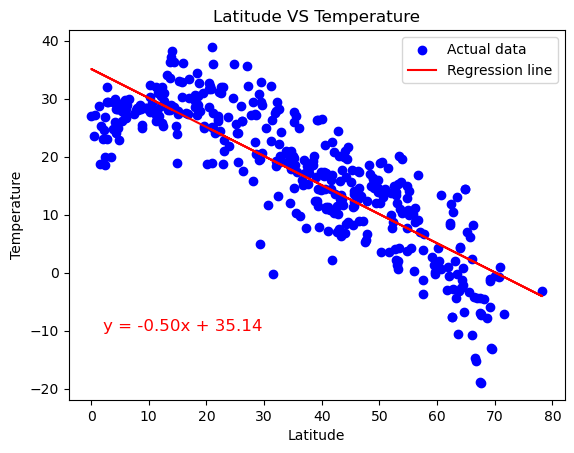

In [104]:
# Linear regression on Northern Hemisphere
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])
r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
Linearreg = slope * northern_hemi_df['Lat'] + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', label='Actual data')
plt.plot(northern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude VS Temperature')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (2, -10), fontsize=12, color='red')
plt.show()

The r-value is:(r-value): 0.7934798246975413


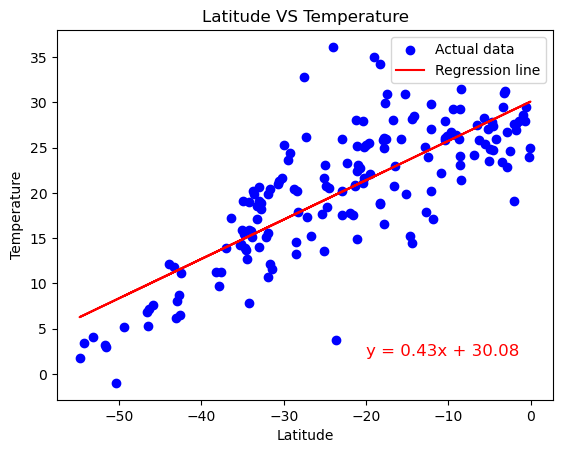

In [105]:
# Linear regression on Southern Hemisphere
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])
r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
Linearreg = slope * southern_hemi_df['Lat'] + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', label='Actual data')
plt.plot(southern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude VS Temperature')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (-20, 2), fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** Positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is:(r-value): 0.13702129377231018


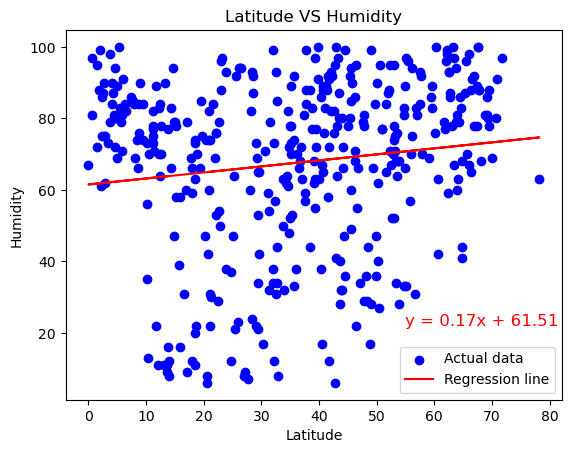

In [103]:
# Northern Hemisphere
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])
r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
Linearreg = slope * northern_hemi_df['Lat'] + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue', label='Actual data')
plt.plot(northern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude VS Humidity')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (55, 22), fontsize=12, color='red')
plt.show()

The r-value is:(r-value): 0.15721350746704668


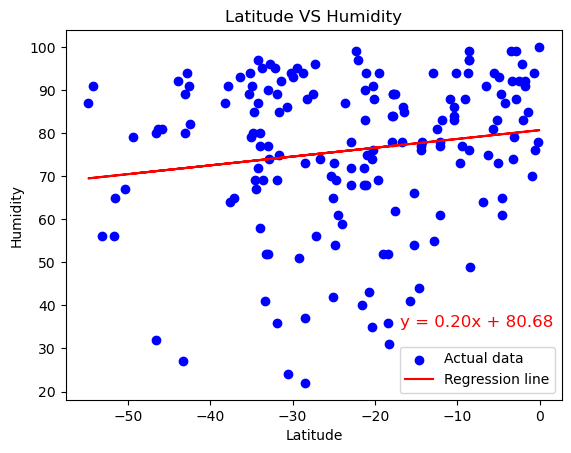

In [102]:
# Southern Hemisphere
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])
r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
Linearreg = slope * southern_hemi_df['Lat'] + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', label='Actual data')
plt.plot(southern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude VS Humidity')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (-17, 35), fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** No correlation

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:(r-value): 0.1085081442320711


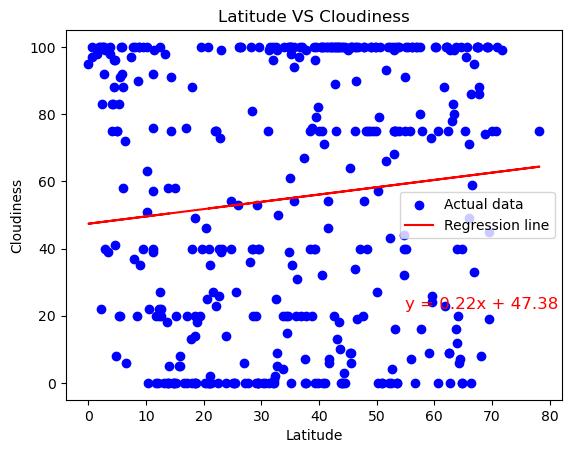

In [101]:
# Northern Hemisphere
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])
r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
Linearreg = slope * northern_hemi_df['Lat'] + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue', label='Actual data')
plt.plot(northern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude VS Cloudiness')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (55, 22), fontsize=12, color='red')
plt.show()

The r-value is:(r-value): 0.06117651764723828


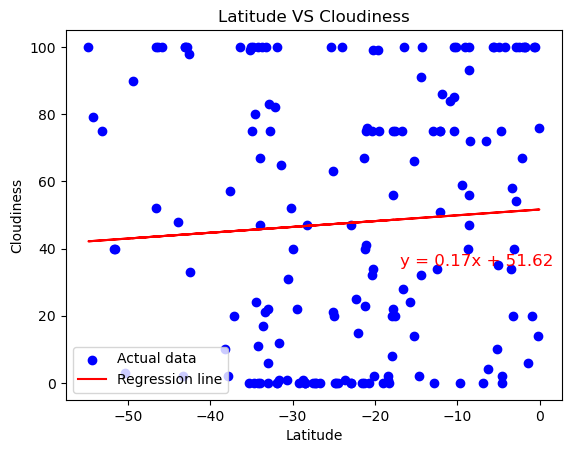

In [100]:
# Southern Hemisphere
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])
r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
Linearreg = slope * southern_hemi_df['Lat'] + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', label='Actual data')
plt.plot(southern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude VS Cloudiness')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (-17, 35), fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** No correlation

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:(r-value): -0.05824640611370919


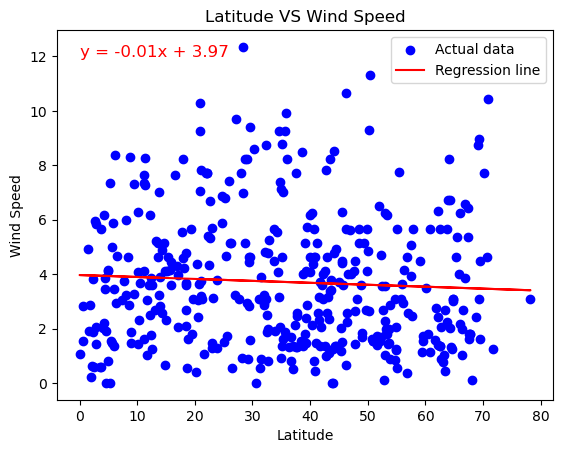

The r-value is: (r_value)


In [96]:
# Northern Hemisphere
correlation = northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])
r_value = northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
Linearreg = slope * northern_hemi_df['Lat'] + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', label='Actual data')
plt.plot(northern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude VS Wind Speed')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (0, 12), fontsize=12, color='red')
plt.show()
print(f'The r-value is: (r_value)')

The r-value is:(r-value): -0.1717749468015759


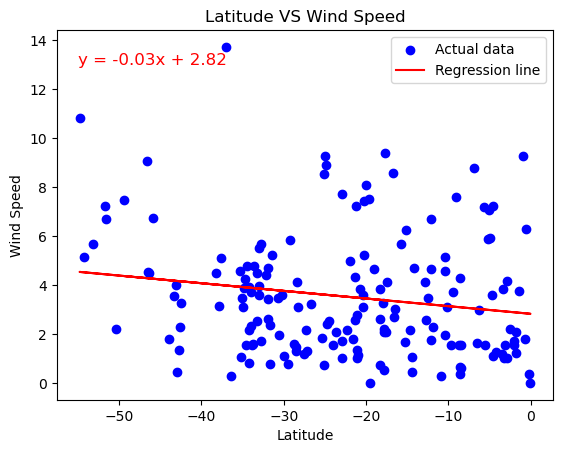

The r-value is: (r_value)


In [106]:
# Southern Hemisphere
correlation = southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])
r_value = southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])
print("The r-value is:(r-value):", r_value)
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
Linearreg = slope * southern_hemi_df['Lat'] + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', label='Actual data')
plt.plot(southern_hemi_df['Lat'], Linearreg, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude VS Wind Speed')
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (-55, 13), fontsize=12, color='red')
plt.show()
print(f'The r-value is: (r_value)')

**Discussion about the linear relationship:** Negative correlation (almost no correlation)